# Decision tree

Stop splitting rules:

    - 100% of one class in node
    - exceeding max depth
    - improvements in purity below treshold
    - number of examples below treshold

***

## Splitting rules

### Entropy

Measure of impurity of the node. Takes values between 0 and 1 (the smaller the better).

$$ E = - \sum_{i=1}^{m} p_i*log_2(p_i) = -p_1*log_2(p_1)-(1-p_1)*log_2(1-p_1) $$

pi - probability of selecting class i in the node

Text(0.5, 1.0, 'Entropy')

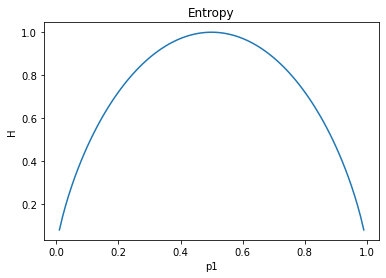

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0.01,0.99,100)
plt.plot(x,-x*np.log2(x)-(1-x)*np.log2(1-x))
plt.xlabel('p1')
plt.ylabel('H')
plt.title('Entropy')

### Gini

Another cryterium for measuring purity of node. Takes values between 0 and 0.5 (the smaller the better).

$$ Gini = 1 - \sum_{i=1}^{m} p_i^{2} = 1-p_1^{2}-(1-p_1)^{2} $$

***

### Information gain

Used to choose the feature to split the data in node. `The higher the better`.

$$ Information Gain = H(p_1)^{root} - (w^{left}*H(p_1)^{left}+w^{right}*H(p_1)^{right}) $$

w stands for wighted average

***

## One-hot encoding

Instead on `one feature taking n values`, create `n features taking 0 or 1 values` (whwther the feature is present for the record)

With this setup we can still use the splitting cryterions like `Gini` or `Entropy`

## Continuous features

For continous values choose a `threshold` that can split the data best (has the best `information gain`).

***

# Regression tree

Tree will group the observations and return `average value` of the `continuous feture` in the `group`.

Splits will be made by reducing the `variance` of the continuous feature in groups.

Information Gain will use `variance instead of entropy` and show largest variance reduction.

$$ Information Gain = Variance^{root} - (w^{left}*Variance^{left}+w^{right}*Variance^{right}) $$

w stands for wighted average

***

In [17]:
import numpy as np

In [40]:
x=np.array([[1,1,1],[0,0,1],[0,1,0],[1,0,1],[1,1,1],[1,1,0],[0,0,0],[1,1,0],[0,1,0],[0,1,0]])
y=np.array([1,1,0,0,1,1,0,1,0,0])

In [41]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)
print(entropy(0.5))

1.0


In [42]:
def split_incides(X,index_feature):
    left_incides=[]
    right_incides=[]
    for i,x in enumerate(X):
        if x[index_feature]==1:
            left_incides.append(i)
        else:
            right_incides.append(i)
    return left_incides, right_incides

In [51]:
def weighted_entropy(X,Y,left_incides,right_incides):
    w_left=len(left_incides)/len(X)
    w_right=len(right_incides)/len(X)
    p_left=sum(Y[left_incides])/len(left_incides)
    p_right=sum(Y[right_incides])/len(right_incides)
    
    weighted_entropy=w_left*entropy(p_left)+w_right*entropy(p_right)
    return weighted_entropy

In [54]:
left_incides,right_incides=split_incides(x,0)
weighted_entropy(x,y,left_incides,right_incides)

0.7219280948873623

In [55]:
def information_gain(X,Y,left_incides,right_incides):
    p_node=sum(Y)/len(Y)
    h_node=entropy(p_node)
    w_entropy=weighted_entropy(X,Y,left_incides,right_incides)
    return h_node-w_entropy

In [57]:
information_gain(x,y,left_incides,right_incides)

0.2780719051126377

In [59]:
for i, feature in enumerate(['ear','face','hair']):
    left_incides,right_incides=split_incides(x,i)
    i_gain=information_gain(x,y,left_incides,right_incides)
    print(f'feature: {feature}, informatio gain: {i_gain:.3f}')

feature: ear, informatio gain: 0.278
feature: face, informatio gain: 0.035
feature: hair, informatio gain: 0.125


***

# Tree ensembles